In [1]:
import os  # Provides functions for interacting with the operating system
import cv2  # OpenCV library for image and video processing
import torch  # PyTorch library for deep learning
import imghdr  # Used to determine the type of image contained in a file
import torchvision  # PyTorch library for vision-related tasks
import numpy as np  # Fundamental package for scientific computing with Python
import pandas as pd  # Data manipulation and analysis library
import tensorflow as tf  # TensorFlow library for deep learning
import matplotlib.pyplot as plt  # Plotting library for creating static, animated, and interactive visualizations
from sklearn.utils import shuffle # For shuffling dataset
from tensorflow.keras import layers  # Core Keras layers API
from tensorflow.keras.models import Sequential  # Sequential model API in Keras
from tensorflow.keras.optimizers import RMSprop  # RMSprop optimizer
from tensorflow.keras.applications import VGG16 # Import pre-trained VGG16 model for feature extraction
from tensorflow.keras.applications.vgg16 import preprocess_input # Function to preprocess input images for VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for image data
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy  # Metrics for model evaluation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  # Core layers for building CNN models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


In [7]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Define the path to your dataset
image_directory = '/kaggle/input/ds-filtered/archive (6)/downSyndorme/downSyndrome'
image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# Optional: Check the file extensions to load only image files (e.g., .jpg, .png)
image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Custom functions for color jittering and contrast adjustment
def color_jitter(img, hue_delta=-5, sat_mult=0.9):
    """ Applies less intense jittering in hue and saturation. """
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    h = np.clip(h + hue_delta, 0, 255).astype(np.uint8)  # Ensure uint8 type for hue
    s = cv2.multiply(s, sat_mult).astype(np.uint8)  # Ensure uint8 type for saturation
    hsv_jittered = cv2.merge([h, s, v])  # Merge channels back
    return cv2.cvtColor(hsv_jittered, cv2.COLOR_HSV2RGB)

def adjust_contrast(img, alpha=0.9):  # Slightly increased alpha for less contrast reduction
    """ Adjusts the contrast of an image to make it less dark. """
    return cv2.convertScaleAbs(img, alpha=alpha, beta=0)

# Create a directory to save augmented images
save_directory = '/kaggle/working/augmented_images/'
os.makedirs(save_directory, exist_ok=True)

# Set up image augmentation with ImageDataGenerator
datagen = ImageDataGenerator(
    width_shift_range=0.02,
    height_shift_range=0.02,
    rotation_range=30,
    zoom_range=0.1, 
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.3, 0.5]
)

# Loop through all images in the dataset
for image_file in image_files:
    img_path = os.path.join(image_directory, image_file)
    img = load_img(img_path)  # Load the image
    img_array = img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the input shape required by Keras

    # Generate augmented images and save them
    i = 0
    for batch in datagen.flow(img_array, batch_size=1):
        augmented_img = batch[0].astype(np.uint8)  # Convert to uint8 for OpenCV processing

        # Apply custom color jitter and contrast adjustments
        augmented_img = color_jitter(augmented_img)
        augmented_img = adjust_contrast(augmented_img)

        # Save the final augmented image
        final_img = array_to_img(augmented_img)
        final_img.save(os.path.join(save_directory, f'aug_{i}_{image_file}'))
        
        i += 1
        if i >= 6:  # Save 6 augmented images per original image
            break

print("Image augmentation completed and saved in:", save_directory)



Image augmentation completed and saved in: /kaggle/working/augmented_images/


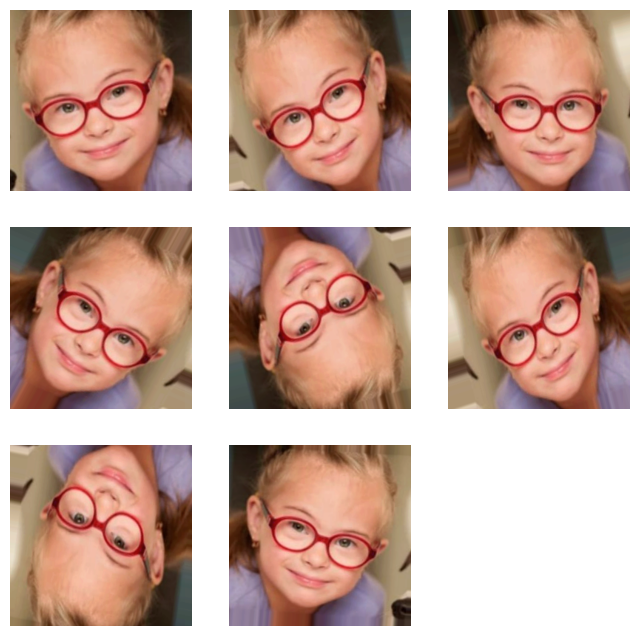

In [6]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Define the path to your dataset
image_directory = '/kaggle/input/ds-filtered/archive (6)/downSyndorme/downSyndrome'
image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# Optional: Check the file extensions to load only image files (e.g., .jpg, .png)
image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Custom functions for color jittering and contrast adjustment
def color_jitter(img, hue_delta=-5, sat_mult=0.9):
    """ Applies less intense jittering in hue and saturation. """
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    h = np.clip(h + hue_delta, 0, 255).astype(np.uint8)  # Ensure uint8 type for hue
    s = cv2.multiply(s, sat_mult).astype(np.uint8)  # Ensure uint8 type for saturation
    hsv_jittered = cv2.merge([h, s, v])  # Merge channels back
    return cv2.cvtColor(hsv_jittered, cv2.COLOR_HSV2RGB)

def adjust_contrast(img, alpha=0.9):  # Slightly increased alpha for less contrast reduction
    """ Adjusts the contrast of an image to make it less dark. """
    return cv2.convertScaleAbs(img, alpha=alpha, beta=0)

# Create a directory to save augmented images
save_directory = '/kaggle/working/augmented_images/'
os.makedirs(save_directory, exist_ok=True)

# Set up image augmentation with ImageDataGenerator
datagen = ImageDataGenerator(
    width_shift_range=0.02,
    height_shift_range=0.02,
    rotation_range=30,
    zoom_range=0.1, 
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.3, 0.5]
)


# Optional: Visualize a few augmented images
if len(image_files) > 0:
    img_path = os.path.join(image_directory, image_files[400])
    img = load_img(img_path)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Visualize 9 augmented images
    augmented_images = datagen.flow(img_array, batch_size=1)
    plt.figure(figsize=(8, 8))
    for i in range(8):  # Display 9 augmented images
        plt.subplot(3, 3, i + 1)
        batch = augmented_images.__next__()
        img_aug = batch[0].astype(np.uint8)
        
        # Apply custom augmentations for visualization
        img_aug = color_jitter(img_aug)
        img_aug = adjust_contrast(img_aug)
        
        plt.imshow(array_to_img(img_aug))
        plt.axis('off')

    plt.show()
else:
    print("No image files found in the directory.")
